<a href="https://colab.research.google.com/github/laresamdeola/Research/blob/main/Ensemble_Approach_and_Enhanced_Features_for_Precise_Bank_Churn_Prediction_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import keras
import tensorflow as tf
from keras import layers
import sklearn.metrics as metrics

In [ ]:
data = pd.read_csv("Churn Modeling.csv")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
data.corr()

<ipython-input-4-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


In [ ]:
data.corr().style.background_gradient(cmap='gist_heat')
# 'RdBu_r', 'BrBG_r', & PuOr_r are other good diverging colormaps

<ipython-input-5-2d22b1454142>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr().style.background_gradient(cmap='gist_heat')


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [ ]:
mask_not_churn = data.loc[:, "Exited"] == 0
data[mask_not_churn]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,9994,15569266,Rahman,644,France,Male,28,7,155060.41,1,1,0,29179.52,0
9994,9995,15719294,Wood,800,France,Female,29,2,0.00,2,0,0,167773.55,0
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0


In [ ]:
len(data[mask_not_churn])

7963

In [ ]:
mask_churn = data.loc[:, "Exited"] == 1
data[mask_churn]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
16,17,15737452,Romeo,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9981,9982,15672754,Burbidge,498,Germany,Male,42,3,152039.70,1,1,1,53445.17,1
9982,9983,15768163,Griffin,655,Germany,Female,46,7,137145.12,1,1,0,115146.40,1
9991,9992,15769959,Ajuluchukwu,597,France,Female,53,4,88381.21,1,1,0,69384.71,1
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1


In [ ]:
len(data[mask_not_churn])

7963

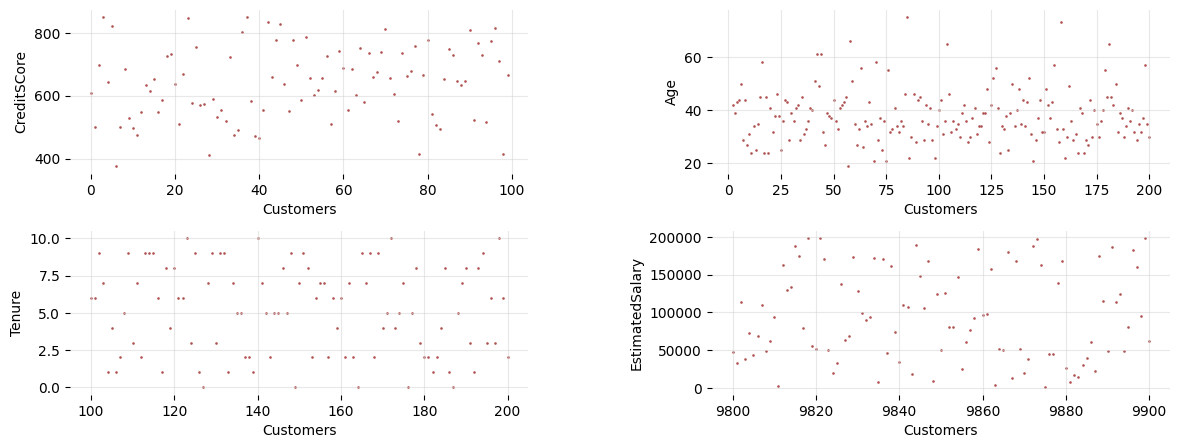

In [ ]:
plt.figure(figsize=(10, 2.75))

plt.subplot(2, 2, 1)
plt.scatter(range(0,100), data.loc[1:100, "CreditScore"], c="#AE5151", s=0.75)
plt.xlabel("Customers")
plt.ylabel("CreditSCore")
#plt.margins(2)
#plt.subplots_adjust(bottom=0.15)
plt.grid(color="lightgray", alpha=0.5, zorder=1)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

plt.subplot(2, 2, 2)
plt.scatter(range(2,201), data.loc[2:200, "Age"], c="#AE5151", s=0.75)
plt.xlabel("Customers")
plt.ylabel("Age")
#plt.subplots_adjust(bottom=0.15)
plt.grid(color="lightgray", alpha=0.5, zorder=1)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

plt.subplot(2, 2, 3)
#plt.title("Spread of the Values of Tenure")
plt.scatter(range(100,201), data.loc[100:200, "Tenure"], c="#AE5151", s=0.75)
plt.xlabel("Customers")
plt.ylabel("Tenure")
#plt.subplots_adjust(bottom=0.15)
plt.grid(color="lightgray", alpha=0.5, zorder=1)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

plt.subplot(2, 2, 4)
#plt.title("Spread of the Values of Estimated Salary")
plt.scatter(range(9800,9901), data.loc[9800:9900, "EstimatedSalary"], c="#AE5151", s=0.75)
plt.xlabel("Customers")
plt.ylabel("EstimatedSalary")
#plt.subplots_adjust(bottom=0.15)
plt.grid(color="lightgray", alpha=0.5, zorder=1)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)


plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=1.2,
                    top=1.5,
                    wspace=0.4,
                    hspace=0.35)


plt.savefig('bankchurnfeaturespread.png', dpi=150, bbox_inches='tight')

plt.show()

In [ ]:
data.loc[:, "SBratio"] = (data.loc[:, "EstimatedSalary"]) / (data.loc[:, "Balance"])

In [ ]:
for i in range(0, len(data.loc[:, "SBratio"])):
  #print(data.loc[i, "Liquidity"])
  if data.loc[i, "SBratio"] == float('inf'):
    data.loc[i, "SBratio"] = 0

In [ ]:
data.loc[:, ["SBratio", "Exited"]]

,SBratio,Exited
0,0.000000,1
1,1.342864,0
2,0.713585,1
3,0.000000,0
4,0.630098,0
...,...,...
9995,0.000000,0
9996,1.772712,0
9997,0.000000,1
9998,1.237271,1


In [ ]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'SBratio'],
      dtype='object')

In [ ]:
data.loc[:, ["CreditScore", "Geography", "Gender", "Tenure", 'Balance', 'EstimatedSalary', "Age", 'SBratio', "Exited"]].corr()

<ipython-input-16-1c45124ed265>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.loc[:, ["CreditScore", "Geography", "Gender", "Tenure", 'Balance', 'EstimatedSalary', "Age", 'SBratio', "Exited"]].corr()


,CreditScore,Tenure,Balance,EstimatedSalary,Age,SBratio,Exited
CreditScore,1.000000,0.000842,0.006268,-0.001384,-0.003965,0.011160,-0.027094
Tenure,0.000842,1.000000,-0.012254,0.007784,-0.009997,-0.011567,-0.014001
Balance,0.006268,-0.012254,1.000000,0.012797,0.028308,0.380992,0.118533
EstimatedSalary,-0.001384,0.007784,0.012797,1.000000,-0.007201,0.418101,0.012097
Age,-0.003965,-0.009997,0.028308,-0.007201,1.000000,0.018029,0.285323
SBratio,0.011160,-0.011567,0.380992,0.418101,0.018029,1.000000,0.081727
Exited,-0.027094,-0.014001,0.118533,0.012097,0.285323,0.081727,1.000000


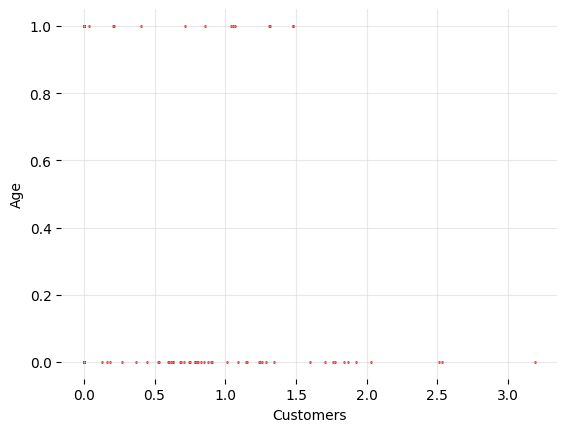

In [ ]:
#plt.subplot(2, 2, 2)
plt.scatter(data.loc[1:100, "SBratio"], data.loc[1:100, "Exited"], c="r", s=0.75)
plt.xlabel("Customers")
plt.ylabel("Age")
#plt.subplots_adjust(bottom=0.15)
plt.grid(color="lightgray", alpha=0.5, zorder=1)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

In [ ]:
# Generations

#2023 - 92

"""
Silent Generation  = 1928 - 1945 0
Baby Boomers = 1946 - 1964 1
Generation X = 1965 - 1980 2
Millenials = 1981 - 1996 3
Generation Z = 1997 - 2012 4
Generation Alpha = 2013 - present
"""

current_year = 2023

silent_upper_bound = current_year - 1928
silent_lower_bound = current_year - 1945
boomer_upper_bound = current_year - 1946
boomer_lower_bound = current_year - 1964
genx_upper_bound = current_year - 1965
genx_lower_bound = current_year - 1980
millenial_upper_bound = current_year - 1981
millenial_lower_bound = current_year - 1996
genz_upper_bound = current_year - 1997
genz_lower_bound = current_year - 2012

In [ ]:
print(millenial_upper_bound , millenial_lower_bound)

42 27


In [ ]:
data.loc[:, "Generation"] = (data.loc[:, "Age"]) >= 78

In [ ]:
def generations(row):
  generation_index = 0
  if row >= 78:
    generation_index = 0
  elif row >= 59 and row < 78:
    generation_index = 1
  elif row >= 43 and row < 59:
    generation_index = 2
  elif row >= 27 and row <= 42:
    generation_index = 3
  elif row < 27:
    generation_index = 4
  return generation_index

In [ ]:
data.loc[:, "Generation"] = data.loc[:, "Age"].apply(generations)

In [ ]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,SBratio,Generation
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0.000000,3
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1.342864,3
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0.713585,3
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0.000000,3
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0.630098,2


In [ ]:
silent_generation_not_churned = (data.loc[:, "Exited"] == 0) & (data.loc[:, "Generation"] == 0)

In [ ]:
len(data.loc[:, "Generation"][silent_generation_not_churned])

23

In [ ]:
silent_generation_churned = (data.loc[:, "Exited"] == 1) & (data.loc[:, "Generation"] == 0)

In [ ]:
len(data.loc[:, "Generation"][silent_generation_churned])

1

In [ ]:
len(data[data.loc[:, "Age"] >= 78])

24

In [ ]:
boomer_generation_not_churned = (data.loc[:, "Exited"] == 0) & (data.loc[:, "Generation"] == 1)
len(data.loc[:, "Generation"][boomer_generation_not_churned])

388

In [ ]:
boomer_generation_churned = (data.loc[:, "Exited"] == 1) & (data.loc[:, "Generation"] == 1)
len(data.loc[:, "Generation"][boomer_generation_churned])

176

In [ ]:
genx_not_churned = (data.loc[:, "Exited"] == 0) & (data.loc[:, "Generation"] == 2)
len(data.loc[:, "Generation"][genx_not_churned])

1278

In [ ]:
genx_churned = (data.loc[:, "Exited"] == 1) & (data.loc[:, "Generation"] == 2)
len(data.loc[:, "Generation"][genx_churned])

1028

In [ ]:
millenials_not_churned = (data.loc[:, "Exited"] == 0) & (data.loc[:, "Generation"] == 3)
len(data.loc[:, "Generation"][millenials_not_churned])

5523

In [ ]:
millenials_churned = (data.loc[:, "Exited"] == 1) & (data.loc[:, "Generation"] == 3)
len(data.loc[:, "Generation"][millenials_churned])

772

In [ ]:
genz_not_churned = (data.loc[:, "Exited"] == 0) & (data.loc[:, "Generation"] == 4)
len(data.loc[:, "Generation"][genz_not_churned])

751

In [ ]:
genz_churned = (data.loc[:, "Exited"] == 1) & (data.loc[:, "Generation"] == 4)
len(data.loc[:, "Generation"][genz_churned])

60

In [ ]:
def sbratio_probability_not_churn(row):
  probs_not_churn = 0
  if row >= 0.59 and row < 1.025:
    probs_not_churn = 0.31
  elif row >= 1.025:
    probs_not_churn = 0.18
  elif row == 0:
    probs_not_churn = 0.31
  elif row > 0 and row < 0.59:
    probs_not_churn = 0.2
  return probs_not_churn

def sbratio_probability_churn(row):
  probs_churn = 0
  if row >= 0.59 and row < 1.025:
    probs_churn = 0.09
  elif row >= 1.025:
    probs_churn = 0.06
  elif row == 0:
    probs_churn = 0.05
  elif row > 0 and row < 0.59:
    probs_churn = 0.8
  return probs_churn

In [ ]:
data.loc[:, "SBProbNotChurn"] = data.loc[:, "SBratio"].apply(sbratio_probability_not_churn)

In [ ]:
data.loc[:, "SBProbChurn"] = data.loc[:, "SBratio"].apply(sbratio_probability_churn)

In [ ]:
print(data.loc[:, "SBratio"])

0       0.000000
1       1.342864
2       0.713585
3       0.000000
4       0.630098
          ...   
9995    0.000000
9996    1.772712
9997    0.000000
9998    1.237271
9999    0.293453
Name: SBratio, Length: 10000, dtype: float64


In [ ]:
def generation_not_churn_probabilities(row):
  likelihood = 0
  if row == 0:
    likelihood = 0.96
  elif row == 1:
    likelihood = 0.69
  elif row == 2:
    likelihood = 0.55
  elif row == 3:
    likelihood = 0.87
  elif row == 4:
    likelihood = 0.93
  return likelihood

def generation_churn_probabilities(row):
  likelihood_2 = 0
  if row == 0:
    likelihood_2 = 0.04
  elif row == 1:
    likelihood_2 = 0.31
  elif row == 2:
    likelihood_2 = 0.45
  elif row == 3:
    likelihood_2 = 0.12
  elif row == 4:
    likelihood_2 = 0.07
  return likelihood_2

In [ ]:
data.loc[:, "GenProbNotChurn"] = data.loc[:, "Generation"].apply(generation_not_churn_probabilities)

In [ ]:
data.loc[:, "GenProbChurn"] = data.loc[:, "Generation"].apply(generation_churn_probabilities)

In [ ]:
def credit_worthiness(row):
  credit_worthy = None
  if row <= 720:
    credit_worthy = 0
  elif row >= 721 and row < 800:
    credit_worthy = 1
  elif row >= 800:
    credit_worthy = 2
  return credit_worthy

In [ ]:
data.loc[:, "CreditWorthiness"] = data.loc[:, "CreditScore"].apply(credit_worthiness)

In [ ]:
low_credit_worthiness_not_churned = (data.loc[:, "Exited"] == 0) & (data.loc[:, "CreditWorthiness"] == 0)

In [ ]:
low_credit_worthiness_churned = (data.loc[:, "Exited"] == 1) & (data.loc[:, "CreditWorthiness"] == 0)

In [ ]:
len(data[low_credit_worthiness_churned])

1551

In [ ]:
len(data[low_credit_worthiness_not_churned])

6041

In [ ]:
low_credit_not_churned_probs = len(data[low_credit_worthiness_not_churned]) / (len(data[low_credit_worthiness_churned]) + len(data[low_credit_worthiness_not_churned]))

In [ ]:
print(low_credit_not_churned_probs)

0.7957060063224447


In [ ]:
low_credit_churned_probs = len(data[low_credit_worthiness_churned]) / (len(data[low_credit_worthiness_churned]) + len(data[low_credit_worthiness_not_churned]))

In [ ]:
fair_credit_worthiness_not_churned = (data.loc[:, "Exited"] == 0) & (data.loc[:, "CreditWorthiness"] == 1)

In [ ]:
fair_credit_worthiness_churned = (data.loc[:, "Exited"] == 1) & (data.loc[:, "CreditWorthiness"] == 1)

In [ ]:
len(data[fair_credit_worthiness_not_churned])

1395

In [ ]:
len(data[fair_credit_worthiness_churned])

358

In [ ]:
fair_credit_worthiness_not_churned_probs = len(data[fair_credit_worthiness_not_churned]) / (len(data[fair_credit_worthiness_not_churned]) + len(data[fair_credit_worthiness_churned]))

In [ ]:
fair_credit_worthiness_churned_probs = len(data[fair_credit_worthiness_churned]) / (len(data[fair_credit_worthiness_not_churned]) + len(data[fair_credit_worthiness_churned]))

In [ ]:
print(fair_credit_worthiness_not_churned_probs)

0.7957786651454649


In [ ]:
good_credit_worthiness_not_churned = (data.loc[:, "Exited"] == 0) & (data.loc[:, "CreditWorthiness"] == 2)

In [ ]:
good_credit_worthiness_churned = (data.loc[:, "Exited"] == 1) & (data.loc[:, "CreditWorthiness"] == 2)

In [ ]:
len(data[good_credit_worthiness_not_churned])

527

In [ ]:
len(data[good_credit_worthiness_churned])

128

In [ ]:
good_credit_worthiness_not_churned_probs = len(data[good_credit_worthiness_not_churned]) / (len(data[good_credit_worthiness_not_churned]) + len(data[good_credit_worthiness_churned]))

In [ ]:
good_credit_worthiness = data.loc[:, "CreditWorthiness"] == 2

In [ ]:
def credit_worthy_not_churned_probability(row):
  probs = 0
  if row == 0:
    probs =0.795
  elif row == 1:
    probs == 0.795
  elif row == 2:
    probs = 0.8
  return probs

def credit_worthy_churned_probability(row):
  probs = 0
  if row == 0:
    probs =0.205
  elif row == 1:
    probs == 0.205
  elif row == 2:
    probs = 0.2
  return probs

In [ ]:
data.loc[:, "CreditNotChurnedProbs"] = data.loc[:, "CreditWorthiness"].apply(credit_worthy_not_churned_probability)

In [ ]:
data.loc[:, "CreditChurnedProbs"] = data.loc[:, "CreditWorthiness"].apply(credit_worthy_churned_probability)

In [ ]:
data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,...,Exited,SBratio,Generation,SBProbNotChurn,SBProbChurn,GenProbNotChurn,GenProbChurn,CreditWorthiness,CreditNotChurnedProbs,CreditChurnedProbs
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,...,0,0.000000,3,0.31,0.05,0.87,0.12,1,0.000,0.000
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,...,0,1.772712,3,0.18,0.06,0.87,0.12,0,0.795,0.205
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,...,1,0.000000,3,0.31,0.05,0.87,0.12,0,0.795,0.205
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,...,1,1.237271,3,0.18,0.06,0.87,0.12,1,0.000,0.000
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,...,0,0.293453,3,0.20,0.80,0.87,0.12,1,0.000,0.000


In [ ]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,...,Exited,SBratio,Generation,SBProbNotChurn,SBProbChurn,GenProbNotChurn,GenProbChurn,CreditWorthiness,CreditNotChurnedProbs,CreditChurnedProbs
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,...,1,0.000000,3,0.31,0.05,0.87,0.12,0,0.795,0.205
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,...,0,1.342864,3,0.18,0.06,0.87,0.12,0,0.795,0.205
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,...,1,0.713585,3,0.31,0.09,0.87,0.12,0,0.795,0.205
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,...,0,0.000000,3,0.31,0.05,0.87,0.12,0,0.795,0.205
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,...,0,0.630098,2,0.31,0.09,0.55,0.45,2,0.800,0.200


In [ ]:
data[0:200]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,...,Exited,SBratio,Generation,SBProbNotChurn,SBProbChurn,GenProbNotChurn,GenProbChurn,CreditWorthiness,CreditNotChurnedProbs,CreditChurnedProbs
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,...,1,0.000000,3,0.31,0.05,0.87,0.12,0,0.795,0.205
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,...,0,1.342864,3,0.18,0.06,0.87,0.12,0,0.795,0.205
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,...,1,0.713585,3,0.31,0.09,0.87,0.12,0,0.795,0.205
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,...,0,0.000000,3,0.31,0.05,0.87,0.12,0,0.795,0.205
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,...,0,0.630098,2,0.31,0.09,0.55,0.45,2,0.800,0.200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,15594815,Aleshire,807,France,Male,35,3,174790.15,1,...,0,0.003435,3,0.20,0.80,0.87,0.12,2,0.800,0.200
196,197,15635905,Moran,616,Spain,Female,32,6,0.00,2,...,0,0.000000,3,0.31,0.05,0.87,0.12,0,0.795,0.205
197,198,15777892,Samsonova,721,Germany,Male,37,3,107720.64,1,...,0,1.472245,3,0.18,0.06,0.87,0.12,1,0.000,0.000
198,199,15656176,Jenkins,501,France,Male,57,10,0.00,2,...,0,0.000000,2,0.31,0.05,0.55,0.45,0,0.795,0.205


In [ ]:
print(data.columns)

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'SBratio', 'Generation',
       'SBProbNotChurn', 'SBProbChurn', 'GenProbNotChurn', 'GenProbChurn',
       'CreditWorthiness', 'CreditNotChurnedProbs', 'CreditChurnedProbs'],
      dtype='object')


In [ ]:
def weight_double(row):
  factor = row
  return factor * factor

In [ ]:
data.loc[:, "GenProbNotChurn"].apply(weight_double)

data.loc[:, "GenProbChurn"].apply(weight_double)

data.loc[:, "SBProbChurn"].apply(weight_double)

data.loc[:, "SBProbNotChurn"].apply(weight_double)

data.loc[:, "CreditNotChurnedProbs"].apply(weight_double)

data.loc[:, "CreditChurnedProbs"].apply(weight_double)

0       0.042025
1       0.042025
2       0.042025
3       0.042025
4       0.040000
          ...   
9995    0.000000
9996    0.042025
9997    0.042025
9998    0.000000
9999    0.000000
Name: CreditChurnedProbs, Length: 10000, dtype: float64

In [ ]:
data = data[['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Generation', 'SBratio', 'CreditWorthiness', 'SBProbNotChurn', 'SBProbChurn', 'GenProbNotChurn', 'GenProbChurn', 'CreditNotChurnedProbs', 'CreditChurnedProbs', 'Exited']]

In [ ]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Generation', 'SBratio',
       'CreditWorthiness', 'SBProbNotChurn', 'SBProbChurn', 'GenProbNotChurn',
       'GenProbChurn', 'CreditNotChurnedProbs', 'CreditChurnedProbs',
       'Exited'],
      dtype='object')

In [ ]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Generation,SBratio,CreditWorthiness,SBProbNotChurn,SBProbChurn,GenProbNotChurn,GenProbChurn,CreditNotChurnedProbs,CreditChurnedProbs,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,2.730500,0.585576,0.306300,0.253012,0.226004,0.791138,0.202567,0.655964,0.168736,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.697365,0.820327,0.586101,0.060594,0.307373,0.139767,0.143357,0.302446,0.077808,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,0.000000,0.180000,0.050000,0.550000,0.040000,0.000000,0.000000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,2.000000,0.000000,0.000000,0.180000,0.050000,0.690000,0.120000,0.795000,0.205000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,3.000000,0.372599,0.000000,0.310000,0.060000,0.870000,0.120000,0.795000,0.205000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,3.000000,1.025033,0.000000,0.310000,0.090000,0.870000,0.310000,0.795000,0.205000,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,4.000000,46.983233,2.000000,0.310000,0.800000,0.960000,0.450000,0.800000,0.205000,1.000000


In [ ]:
data.corr()

<ipython-input-78-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Generation,SBratio,CreditWorthiness,SBProbNotChurn,SBProbChurn,GenProbNotChurn,GenProbChurn,CreditNotChurnedProbs,CreditChurnedProbs,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.004566,-0.002252,-0.003991,0.003546,0.004028,0.006512,-0.006821,0.001606,0.001679,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.009395,0.009366,0.004828,0.007238,-0.009975,-0.003379,0.003374,0.001979,0.001839,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,0.004308,0.011160,0.742303,-0.009396,0.003784,0.013261,-0.013254,-0.497184,-0.508247,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,-0.912072,0.018029,-0.000024,-0.013816,0.010637,-0.698571,0.697747,0.002915,0.002877,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,0.011975,-0.011567,-0.000366,-0.000015,-0.011003,0.008104,-0.007897,-0.004612,-0.004543,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,-0.023566,0.380992,0.005127,-0.601713,0.467718,-0.041213,0.041347,-0.005183,-0.005237,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,0.028820,-0.162288,0.005867,0.228936,-0.154851,0.029163,-0.029325,0.005215,0.005009,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,0.007652,-0.013308,-0.009338,0.006772,-0.000177,0.015841,-0.016054,0.002698,0.002883,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.073114,-0.007437,0.011693,0.002560,0.001727,-0.011213,0.012419,-0.004708,-0.004923,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.006819,0.418101,0.004941,-0.079731,-0.573841,0.000384,-0.000176,-0.006119,-0.006156,0.012097


In [ ]:
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,...,Generation,SBratio,CreditWorthiness,SBProbNotChurn,SBProbChurn,GenProbNotChurn,GenProbChurn,CreditNotChurnedProbs,CreditChurnedProbs,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,...,3,0.000000,0,0.31,0.05,0.87,0.12,0.795,0.205,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,...,3,1.342864,0,0.18,0.06,0.87,0.12,0.795,0.205,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,...,3,0.713585,0,0.31,0.09,0.87,0.12,0.795,0.205,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,...,3,0.000000,0,0.31,0.05,0.87,0.12,0.795,0.205,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,...,2,0.630098,2,0.31,0.09,0.55,0.45,0.800,0.200,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,...,3,0.000000,1,0.31,0.05,0.87,0.12,0.000,0.000,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,...,3,1.772712,0,0.18,0.06,0.87,0.12,0.795,0.205,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,...,3,0.000000,0,0.31,0.05,0.87,0.12,0.795,0.205,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,...,3,1.237271,1,0.18,0.06,0.87,0.12,0.000,0.000,1


In [ ]:
X = data.iloc[:, 3:-1].values
y = data.iloc[:, -1].values

In [ ]:
mask_credit_score = (data.loc[:, "CreditScore"] <= 584)

print(len(data[mask_credit_score]))

# g00d = 2550
# fair = 2544
# low = 2534

2534


In [ ]:
print(len(data.columns))

23


In [ ]:
#X[:, 13]

In [ ]:
churned = []
unchurned = []

for i in range(0, len(y)):
  if y[i] == 0:
    unchurned.append(y[i])
  else:
    churned.append(y[i])

In [ ]:
print(len(churned), len(unchurned))

2037 7963


In [ ]:
credit_score = data.iloc[:, 3].values

In [ ]:
print(credit_score.max())

850


In [ ]:
X[:, 11]

array([0.0, 1.342864261180276, 0.7135851129394317, ..., 0.0,
       1.237271214730915, 0.29345290661126905], dtype=object)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
ord_encoder = OrdinalEncoder()
X[:, 2:3] = ord_encoder.fit_transform(X[:, 2:3])

In [ ]:
print(X)

[[619 'France' 0.0 ... 0.12 0.795 0.205]
 [608 'Spain' 0.0 ... 0.12 0.795 0.205]
 [502 'France' 0.0 ... 0.12 0.795 0.205]
 ...
 [709 'France' 0.0 ... 0.12 0.795 0.205]
 [772 'Germany' 1.0 ... 0.12 0.0 0.0]
 [792 'France' 0.0 ... 0.12 0.0 0.0]]


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1, 10])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [ ]:
print(X)

[[1.0 0.0 0.0 ... 0.12 0.795 0.205]
 [0.0 0.0 1.0 ... 0.12 0.795 0.205]
 [1.0 0.0 0.0 ... 0.12 0.795 0.205]
 ...
 [1.0 0.0 0.0 ... 0.12 0.795 0.205]
 [0.0 1.0 0.0 ... 0.12 0.0 0.0]
 [1.0 0.0 0.0 ... 0.12 0.0 0.0]]


Using SMOTE to balance the class distribution

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

resample = SMOTE()
X, y = resample.fit_resample(X, y)
counter = Counter(y)
print(counter)

Counter({1: 7963, 0: 7963})


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=1)

In [ ]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,...,Generation,SBratio,CreditWorthiness,SBProbNotChurn,SBProbChurn,GenProbNotChurn,GenProbChurn,CreditNotChurnedProbs,CreditChurnedProbs,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,...,3,0.000000,0,0.31,0.05,0.87,0.12,0.795,0.205,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,...,3,1.342864,0,0.18,0.06,0.87,0.12,0.795,0.205,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,...,3,0.713585,0,0.31,0.09,0.87,0.12,0.795,0.205,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,...,3,0.000000,0,0.31,0.05,0.87,0.12,0.795,0.205,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,...,2,0.630098,2,0.31,0.09,0.55,0.45,0.800,0.200,0


In [ ]:
#data.corr()

In [ ]:
X_train[:, :]

In [ ]:
X_train.shape[1]

In [ ]:
data.head()

In [ ]:
data.iloc[:, :-5]

In [ ]:
X_train[:, :-4]

In [ ]:
X_train_scaled = X_train
X_test_scaled = X_test

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled[:, :-6] = scaler.fit_transform(X_train_scaled[:, :-6])
X_test_scaled[:, :-6] = scaler.transform(X_test_scaled[:, :-6])

In [ ]:
X_train.shape

Support Vector Machines

In [ ]:
from sklearn.svm import SVC
svm_classifier = SVC(kernel='rbf', random_state=0, probability=True)
svm_classifier.fit(X_train_scaled, y_train)

In [ ]:
y_pred_svm = svm_classifier.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
svm_cm = confusion_matrix(y_test, y_pred_svm)
svm_acc = accuracy_score(y_test, y_pred_svm)

In [ ]:
print(svm_acc)

In [ ]:
probs_svm = svm_classifier.predict_proba(X_test)
preds_svm = probs_svm[:,1]
fpr_svm,tpr_svm,threshold_svm = metrics.roc_curve(y_test, preds_svm)
roc_auc_svm = metrics.auc(fpr_svm, tpr_svm)

In [ ]:
from sklearn.metrics import classification_report
target = ["class 0", "class 1"]
print(classification_report(y_test, y_pred_svm, target_names=target))

  Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegressionCV
log_classifier = LogisticRegressionCV(random_state=0)
log_classifier.fit(X_train_scaled, y_train)

In [ ]:
y_pred_log = log_classifier.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
log_cm = confusion_matrix(y_test, y_pred_log)
log_acc = accuracy_score(y_test, y_pred_log)

In [ ]:
print(log_acc)

In [ ]:
probs_log = log_classifier.predict_proba(X_test)
preds_log = probs_log[:,1]
fpr_log,tpr_log,threshold_log = metrics.roc_curve(y_test, preds_log)
roc_auc_log = metrics.auc(fpr_log, tpr_log)

In [ ]:
from sklearn.metrics import classification_report
target = ["class 0", "class 1"]
print(classification_report(y_test, y_pred_log, target_names=target))

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

In [ ]:
y_pred_rf = rf_classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
rf_cm = confusion_matrix(y_test, y_pred_rf)
rf_acc = accuracy_score(y_test, y_pred_rf)

In [ ]:
print(rf_cm)

In [ ]:
print(rf_acc)

In [ ]:
probs_rf = rf_classifier.predict_proba(X_test)
preds_rf = probs_rf[:,1]
fpr_rf,tpr_rf,threshold_rf = metrics.roc_curve(y_test, preds_rf)
roc_auc_rf = metrics.auc(fpr_rf, tpr_rf)

In [ ]:
from sklearn.metrics import classification_report
target = ["class 0", "class 1"]
print(classification_report(y_test, y_pred_rf, target_names=target))

Decision Trees

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

In [ ]:
y_pred_dt = dt_classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
dt_cm = confusion_matrix(y_test, y_pred_dt)
dt_acc = accuracy_score(y_test, y_pred_dt)

In [ ]:
print(dt_cm)

In [ ]:
print(dt_acc)

In [ ]:
probs_dt = dt_classifier.predict_proba(X_test)
preds_dt = probs_dt[:,1]
fpr_dt,tpr_dt,threshold_dt = metrics.roc_curve(y_test, preds_dt)
roc_auc_dt = metrics.auc(fpr_dt, tpr_dt)

In [ ]:
from sklearn.metrics import classification_report
target = ["class 0", "class 1"]
print(classification_report(y_test, y_pred_dt, target_names=target))

Naive Bayes Classifier.

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

In [ ]:
y_pred_nb = nb_classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
nb_cm = confusion_matrix(y_test, y_pred_nb)
nb_acc = accuracy_score(y_test, y_pred_nb)

In [ ]:
print(nb_cm)

In [ ]:
print(nb_acc)

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies_nb = cross_val_score(estimator = nb_classifier, X = X_train, y = y_train, cv = 5)
print(f'{round(accuracies_nb.mean(), 4) * 100}%')

In [ ]:
probs_nb = nb_classifier.predict_proba(X_test)
preds_nb = probs_nb[:,1]
fpr_nb,tpr_nb,threshold_nb = metrics.roc_curve(y_test, preds_nb)
roc_auc_nb = metrics.auc(fpr_nb, tpr_nb)

In [ ]:
from sklearn.metrics import classification_report
target = ["class 0", "class 1"]
print(classification_report(y_test, y_pred_nb, target_names=target))

Gradient Boosting.

In [ ]:
from xgboost import XGBClassifier
xg_classifier = XGBClassifier()
xg_classifier.fit(X_train, y_train)

In [ ]:
y_pred_xg = xg_classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
xg_cm = confusion_matrix(y_test, y_pred_xg)
xg_acc = accuracy_score(y_test, y_pred_xg)

In [ ]:
print(xg_cm)

In [ ]:
print(xg_acc)

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = xg_classifier, X = X_train, y = y_train, cv = 5)
print(f'{round(accuracies.mean(), 4) * 100}%')

In [ ]:
probs_xg = xg_classifier.predict_proba(X_test)
preds_xg = probs_xg[:,1]
fpr_xg,tpr_xg,threshold_xg = metrics.roc_curve(y_test, preds_xg)
roc_auc_xg = metrics.auc(fpr_xg, tpr_xg)

In [ ]:
from sklearn.metrics import classification_report
target = ["class 0", "class 1"]
print(classification_report(y_test, y_pred_xg, target_names=target))

Ensemble Model

AdaBoost Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada_classifier = AdaBoostClassifier(n_estimators=100)
scores = cross_val_score(ada_classifier, X_train, y_train, cv=5)
scores.mean()

Histogram-Based Gradient Boosting

In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier
hgb_classifier = HistGradientBoostingClassifier(max_iter=100).fit(X_train, y_train)

In [ ]:
hgb_classifier.score(X_test, y_test)

In [ ]:
scores = cross_val_score(hgb_classifier, X_train, y_train, cv=5)
scores.mean()

Stacking

In [ ]:
estimators = [('random forest', rf_classifier), ('adaboost', ada_classifier), ('support vector machines', svm_classifier), ('logistic regression', log_classifier)]

In [ ]:
from sklearn.ensemble import StackingClassifier
final_estimator = hgb_classifier
stacks_classifier = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [ ]:
stacks_classifier.fit(X_train, y_train)

In [ ]:
y_pred_stacks = stacks_classifier.predict(X_test)

In [ ]:
scores_stacks = cross_val_score(stacks_classifier, X_train, y_train, cv=5)
scores_stacks.mean()

In [ ]:
scores_stacks = cross_val_score(stacks_classifier, X_test, y_test, cv=5)
scores_stacks.mean()

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
stacks_cm = confusion_matrix(y_test, y_pred_stacks)
stacks_acc = accuracy_score(y_test, y_pred_stacks)

In [ ]:
print(stacks_cm)

In [ ]:
print(stacks_acc)

In [ ]:
import sklearn.metrics as metrics
probs = stacks_classifier.predict_proba(X_test)
preds = probs[:,1]
fpr,tpr,threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

In [ ]:
from sklearn.metrics import classification_report
labels = ['Customer would not churn', 'Customer would churn']
print(classification_report(y_test, y_pred_stacks, target_names=labels))

In [ ]:
plt.title('ROC Curve for Bank Churn')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
#plt.xlim([0, 1])
#plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig('Bank Churn.jpg')
plt.show()

In [ ]:
#plt.title('Stacked Ensemble Classifier vs other Classifiers')
plt.plot(fpr, tpr, 'r', label = 'SEC - AUC = %0.2f' % roc_auc)
plt.plot(fpr_rf, tpr_rf, 'aquamarine', label = 'RF -AUC = %0.2f' % roc_auc_rf)
plt.plot(fpr_xg, tpr_xg, 'purple', label = '  XG -AUC = %0.2f' % roc_auc_xg)
plt.plot(fpr_svm, tpr_svm, 'seagreen', label = '  SVM -AUC = %0.2f' % roc_auc_svm)
plt.plot(fpr_dt, tpr_dt, 'pink', label = 'DT -AUC = %0.2f' % roc_auc_dt)
plt.plot(fpr_nb, tpr_nb, 'olive', label = '  NB -AUC = %0.2f' % roc_auc_nb)
plt.plot(fpr_log, tpr_log, 'cyan', label = '  LOG -AUC = %0.2f' % roc_auc_log)

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
#plt.xlim([0, 1])
#plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().set_facecolor("white")
plt.grid(color="lightgray", alpha=0.5, zorder=-1)
plt.savefig('stackedensemblevsothers.png', dpi=150, bbox_inches='tight')

plt.show()

In [ ]:
#X_train = np.asarray(X_train).astype('float32')
#X_test = np.asarray(X_test).astype('float32')

In [ ]:
'''

inputs = keras.Input(shape=(X_train.shape[1],), name="Churn Features")
layer_1 = layers.Dense(14, activation="relu", name="dense_layer_1")(inputs)
layer_2 = layers.Dense(14, activation="relu", name="dense_layer_2")(layer_1)
outputs = layers.Dense(2, activation="sigmoid", name="output_layer")(layer_2)

'''

In [ ]:
#model = keras.Model(inputs=inputs, outputs=outputs, name="Bank_Churn_Model_2")

In [ ]:
'''
model.compile(optimizer=keras.optimizers.RMSprop(),
              loss= keras.losses.SparseCategoricalCrossentropy(),
              metrics=[keras.metrics.mae, keras.metrics.sparse_categorical_accuracy])
'''

In [ ]:
#model.summary()

In [ ]:
'''
print("Fitting the model on the training data")
history = model.fit(
    X_train,
    y_train,
    batch_size=32,
    epochs=50
)
'''

In [ ]:
#y_pred = model.predict(X_test)
#y_pred = (y_pred > 0.5)

In [ ]:
'''

test_scores = model.evaluate(X_test, y_test, verbose=2)
print("Test Loss:", test_scores[0])
print("Test accuracy:", test_scores[1])
dict(zip(model.metrics_names, test_scores))

'''

In [ ]:
#print(cm)

In [ ]:
#print(acc)

In [ ]:
"""
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = classifier.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
"""

In [ ]:
"""
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
#plt.xlim([0, 1])
#plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
"""